In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('NintendoGames.csv')

In [7]:
df.head()

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Super Mario RPG,Switch,"Nov 17, 2023",NaN,/game/switch/super-mario-rpg,E,['Nintendo'],"['Role-Playing', 'Japanese-Style']"
1,NaN,WarioWare: Move It!,Switch,"Nov 3, 2023",NaN,/game/switch/warioware-move-it!,RP,['Intelligent Systems'],"['Miscellaneous', 'Party / Minigame']"
2,NaN,Super Mario Bros. Wonder,Switch,"Oct 20, 2023",NaN,/game/switch/super-mario-bros-wonder,E,['Nintendo'],"['Action', 'Platformer', '2D']"
3,NaN,Detective Pikachu Returns,Switch,"Oct 6, 2023",NaN,/game/switch/detective-pikachu-returns,NaN,['Creatures Inc.'],"['Adventure', '3D', 'Third-Person']"
4,NaN,Fae Farm,Switch,"Sep 8, 2023",NaN,/game/switch/fae-farm,E10+,['Phoenix Labs'],"['Simulation', 'Virtual', 'Virtual Life']"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   709 non-null    float64
 1   title        1094 non-null   object 
 2   platform     1094 non-null   object 
 3   date         1094 non-null   object 
 4   user_score   856 non-null    float64
 5   link         1094 non-null   object 
 6   esrb_rating  972 non-null    object 
 7   developers   1091 non-null   object 
 8   genres       1094 non-null   object 
dtypes: float64(2), object(7)
memory usage: 77.1+ KB


### What is the distribution of Metacritic scores for Nintendo games, and are there any notable outliers?

<Axes: ylabel='Frequency'>

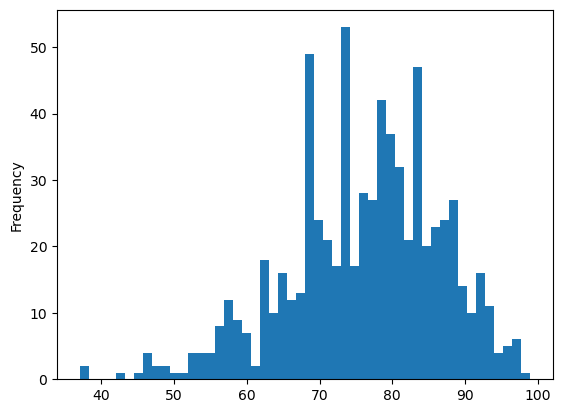

In [34]:
df['meta_score'].plot(kind='hist', bins=50)

In [49]:
df['meta_score'].max() # First we have to know what is the positive standout value

99.0

In [48]:
df[(df['meta_score']==99)] # And this is the positive standout Game 

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
1060,99.0,The Legend of Zelda: Ocarina of Time,N64,"Nov 23, 1998",9.1,/game/nintendo-64/the-legend-of-zelda-ocarina-...,E,['Nintendo'],"['Action Adventure', 'Fantasy']"


In [50]:
df['meta_score'].min() # Second we have to find what is the negative standout value on the DF

37.0

In [68]:
df[(df['meta_score']==37)] # And then, we have this two games as Outliers (Negative)

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
554,37.0,3D Classics: Urban Champion,3DS,"Aug 18, 2011",4.8,/game/3ds/3d-classics-urban-champion,E10+,['Arika'],"['Action', 'Fighting', 'Fighting', '2D', '2D']"
898,37.0,Tenchu: Dark Secret,DS,"Aug 21, 2006",5.6,/game/ds/tenchu-dark-secret,T,"['From Software', ' Polygon Magic']","['Action Adventure', 'Historic', 'General', 'H..."


### Is there a correlation between Metacritic scores and user scores for Nintendo games?

<Axes: ylabel='Frequency'>

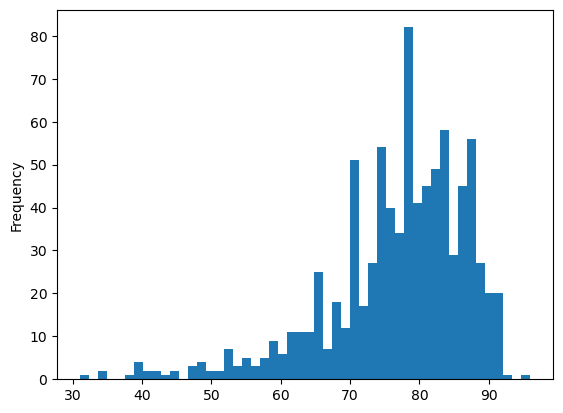

In [73]:
(df['user_score']*10).plot(kind='hist', bins=50) # Put the (values * 10) so we can obtain more similar values 

<Axes: ylabel='Frequency'>

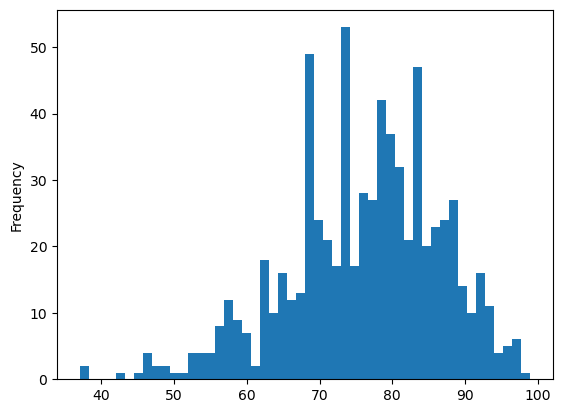

In [70]:
df['meta_score'].plot(kind='hist', bins=50)

<Axes: xlabel='user_score', ylabel='meta_score'>

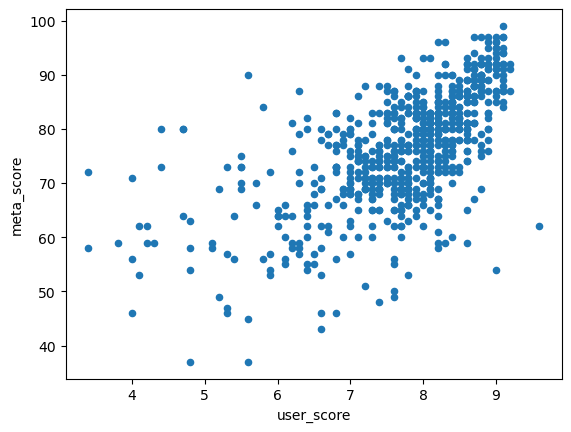

In [76]:
df.plot('user_score','meta_score', kind='scatter') 
# With the scatter graphic we can see more easier the relation between the user_score and the meta_score

In [77]:
# With the graphs we conclude that the correlation is somehow positive, but still has a considerable amount of outliers

In [80]:
df[(df['meta_score']==90)] 
# The game "Animal Crossing: New Horizons" is an example of outlier with 90 metacritic score and 5.6 users score

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
99,90.0,Animal Crossing: New Horizons,Switch,"Mar 20, 2020",5.6,/game/switch/animal-crossing-new-horizons,E,['Nintendo'],"['Simulation', 'Virtual', 'Virtual Life']"
191,90.0,Bayonetta + Bayonetta 2,Switch,"Feb 16, 2018",8.7,/game/switch/bayonetta-+-bayonetta-2,M,['PlatinumGames'],"['Miscellaneous', 'Compilation']"
353,90.0,Mario Kart 8 DLC Pack 2,WIIU,"Apr 23, 2015",8.2,/game/wii-u/mario-kart-8-dlc-pack-2,E,['Nintendo'],"['Driving', 'Kart', 'Racing', 'Arcade', 'Autom..."
426,90.0,The Legend of Zelda: The Wind Waker HD,WIIU,"Sep 20, 2013",9.0,/game/wii-u/the-legend-of-zelda-the-wind-waker-hd,E10+,"['Nintendo', ' HexaDrive']","['Action Adventure', 'Fantasy', 'Fantasy', 'Op..."
536,90.0,Pushmo,3DS,"Dec 8, 2011",8.3,/game/3ds/pushmo,E,['Intelligent Systems'],"['Miscellaneous', 'Puzzle', 'Action', 'Puzzle'..."
542,90.0,Super Mario 3D Land,3DS,"Nov 13, 2011",8.4,/game/3ds/super-mario-3d-land,E,['Nintendo'],"['Action', 'Platformer', 'Platformer', '3D', '..."
685,90.0,Mario & Luigi: Bowser's Inside Story,DS,"Sep 14, 2009",8.8,/game/ds/mario-luigi-bowsers-inside-story,E,['Alphadream Corporation'],"['Role-Playing', 'Action RPG', 'Console-style ..."
791,90.0,The Legend of Zelda: Phantom Hourglass,DS,"Oct 1, 2007",7.9,/game/ds/the-legend-of-zelda-phantom-hourglass,E,['Nintendo'],"['Action Adventure', 'Fantasy', 'Fantasy', 'Op..."
800,90.0,Metroid Prime 3: Corruption,WII,"Aug 27, 2007",8.8,/game/wii/metroid-prime-3-corruption,T,['Retro Studios'],"['Action', 'Shooter', 'Shooter', 'First-Person..."
933,90.0,Advance Wars: Dual Strike,DS,"Aug 22, 2005",8.8,/game/ds/advance-wars-dual-strike,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Modern', 'Modern',..."


### Which Nintendo platform has the highest average Metacritic score?